# Análisis Exploratorio de los Datos (EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
drowning = pd.read_csv("datos-ahogamiento.csv")
drowning.head()

,Fecha,IdAhogado,IdPersona,Localidad,Provincia,CCAA,Hora,Latitud,Longitud,Sexo,...,Actividad,Deteccion,Enlace1,Column,Column2,Column3,Column4,Column5,Column6,Column7
0,2020-12-30,7432,8532,Torredembarra,Tarragona,Cataluña,NaN,41.130523,1.395311,Sin Datos,...,Sin datos,Ciudadano,#https://www.diarimes.com/es/noticias/camp_tar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-29,7431,8531,"Cádiz, Playa de Santa Maria del Mar",Cádiz,Andalucía,17:48,36.519991,-6.287258,Sin Datos,...,Natación recreativa,Ciudadano,#https://elcorreoweb.es/andalucia/encuentran-u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-29,7426,8525,"San Sebastián, Río Urumea",Guipúzcoa,País Vasco,02:30,43.317215,-1.977996,Hombre,...,Circulación en vehiculo,"Acompañante, familiar, amigo",#https://www.lavanguardia.com/local/paisvasco/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-29,7426,8526,"San Sebastián, Río Urumea",Guipúzcoa,País Vasco,02:30,43.317215,-1.977996,Hombre,...,Circulación en vehiculo,"Acompañante, familiar, amigo",#https://www.lavanguardia.com/local/paisvasco/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-28,7427,8527,La Graciosa,Las Palmas,Canarias,07:30,29.225448,-13.502007,Hombre,...,Embarcación a motor,"Acompañante, familiar, amigo",#https://www.canarias7.es/canarias/lanzarote/p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Clean the data
drowning = drowning.iloc[:, :27] # Select the columns of interest
drowning.head()

,Fecha,IdAhogado,IdPersona,Localidad,Provincia,CCAA,Hora,Latitud,Longitud,Sexo,...,Factor,Intervencion,Pronostico,Localizacion,Riesgo,Reanimacion,Vigilancia,Actividad,Deteccion,Enlace1
0,2020-12-30,7432,8532,Torredembarra,Tarragona,Cataluña,NaN,41.130523,1.395311,Sin Datos,...,Sin datos,Recuperación de cadaver,Ahogamiento mortal,Franja costera o alta mar,Sin datos,Recuperacion de cadaver,No vigilado,Sin datos,Ciudadano,#https://www.diarimes.com/es/noticias/camp_tar...
1,2020-12-29,7431,8531,"Cádiz, Playa de Santa Maria del Mar",Cádiz,Andalucía,17:48,36.519991,-6.287258,Sin Datos,...,Sin datos,Recuperación de cadaver,Ahogamiento no mortal con hospitalizacion,Playas sin vigilancia,Sin datos,SVA por SEM,No vigilado,Natación recreativa,Ciudadano,#https://elcorreoweb.es/andalucia/encuentran-u...
2,2020-12-29,7426,8525,"San Sebastián, Río Urumea",Guipúzcoa,País Vasco,02:30,43.317215,-1.977996,Hombre,...,Sin datos,Recuperación de cadaver,Ahogamiento mortal,"Puertos, embarcaderos, amarres",Malas condiciones meterológicas o del agua (Ba...,Recuperacion de cadaver,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",#https://www.lavanguardia.com/local/paisvasco/...
3,2020-12-29,7426,8526,"San Sebastián, Río Urumea",Guipúzcoa,País Vasco,02:30,43.317215,-1.977996,Hombre,...,Sin datos,Recuperación de cadaver,Rescate y traslado a supervisión médica,"Puertos, embarcaderos, amarres",Malas condiciones meterológicas o del agua (Ba...,Sin Reanimacion,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",#https://www.lavanguardia.com/local/paisvasco/...
4,2020-12-28,7427,8527,La Graciosa,Las Palmas,Canarias,07:30,29.225448,-13.502007,Hombre,...,"Navegación, deportes acuáticos",Asistencia por transeúntes adiestrados,Rescate sin consecuencias,Franja costera o alta mar,Sin datos,Sin Reanimacion,No vigilado,Embarcación a motor,"Acompañante, familiar, amigo",#https://www.canarias7.es/canarias/lanzarote/p...


In [5]:
# Crear variable si se ha producido un ahogamiento mortal o no
drowning["AhogamientoMortal"] = np.where(drowning["Pronostico"] == "Ahogamiento mortal", 1, 0)

## Franjas de edades

In [6]:
print(" Edad mínima:", drowning["Edad"].min())
print(" Edad máxima:", drowning["Edad"].max())

 Edad mínima: 1.0
 Edad máxima: 96.0


In [7]:
# Número de ahogamientos por edad
drowning["Edad"].value_counts()

70.0    286
30.0    270
50.0    266
40.0    250
60.0    200
       ... 
93.0      6
92.0      5
91.0      4
96.0      2
95.0      2
Name: Edad, Length: 95, dtype: int64

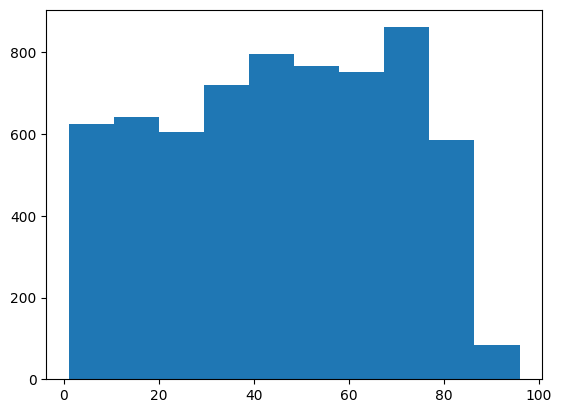

In [8]:
# Frequencia de la variable edad
plt.hist(drowning["Edad"])
plt.show()

### División grupo de edades en edad Baja, Media, Alta

In [9]:
# Consulta "edad" a la base de datos de ahogamiento
drowning_age = drowning["Edad"]

# Baja edad: 0 a 24 años
print("Baja edad: 0 a 29 años ", drowning_age[(drowning_age > 0) & (drowning_age <= 30)].count())

# Media edad: 25 a 59 años
print("Media edad: 30 a 59 años ", drowning_age[(drowning_age >= 31) & (drowning_age <= 59)].count())

# Alta edad: 60 en adelante
print("Alta edad: 60 años en adelante ", drowning_age[(drowning_age >= 60)].count())

Baja edad: 0 a 29 años  2143
Media edad: 30 a 59 años  2104
Alta edad: 60 años en adelante  2190


+ No se tienen en cuenta los 1579 registros por los cuales no hay datos.

### Division grupo de edades en 5 grupos

In [10]:
# Grupo 1
print("Grupo 1: 0 a 15 años ", drowning_age[(drowning_age > 0) & (drowning_age <= 15)].count())

# Grupo 2
print("Grupo 2: 16 a 30 años ", drowning_age[(drowning_age >= 16) & (drowning_age <= 30)].count())

# Grupo 3
print("Grupo 3: 31 a 45 años ", drowning_age[(drowning_age >= 31) & (drowning_age <= 45)].count())

# Grupo 4
print("Grupo 4: 46 a 60 años " ,drowning_age[(drowning_age >= 46) & (drowning_age <= 60)].count())

# Grupo 5
print("Grupo 5: 61 años en adelante ", drowning_age[(drowning_age >= 61)].count())

Grupo 1: 0 a 15 años  1027
Grupo 2: 16 a 30 años  1116
Grupo 3: 31 a 45 años  1063
Grupo 4: 46 a 60 años  1241
Grupo 5: 61 años en adelante  1990


+ Parece razonable mantener la división de grupos de edad por niveles: **baja edad, media edad y alta edad**, ya que es el resultado que mantiene un mejor balanceo de los datos por edad. 

### Medidas estadísticas 

   + Media
   + Mediana
   + Moda
   + Desviación estándard

In [11]:
# Creamos los grupos dividiendo por niveles de edad (baja edad, media edad y alta edad)

low_age = drowning[(drowning["Edad"] > 0) & (drowning["Edad"] <= 30)]

middle_age = drowning[(drowning["Edad"] >= 31) & (drowning["Edad"] <= 59)]

old_age = drowning[(drowning["Edad"] >= 60)]

all_ages = drowning[(drowning["Edad"] > 0) & (drowning["Edad"] <= 100)]

In [12]:
# Baja edad
age1 = low_age["Edad"].describe()

# Media edad
age2 = middle_age["Edad"].describe()

# Alta edad
age3 = old_age["Edad"].describe()

age_description = pd.concat([age1, age2, age3], axis = 1)
age_description.columns = ['low age', 'middle age', 'old age']
age_description

,low age,middle age,old age
count,2143.000000,2104.000000,2190.000000
mean,16.601960,45.349810,72.197717
std,8.755083,7.526606,7.945894
min,1.000000,31.000000,60.000000
25%,10.000000,40.000000,66.000000
50%,16.000000,45.000000,71.000000
75%,24.000000,51.000000,78.000000
max,30.000000,59.000000,96.000000


In [13]:
# La moda por grupo de edad
print("Low age: ", low_age["Edad"].mode(), "\n\nMiddle age: ", middle_age["Edad"].mode(), "\n\nOld age: ", old_age["Edad"].mode())

Low age:  0    30.0
Name: Edad, dtype: float64 

Middle age:  0    50.0
Name: Edad, dtype: float64 

Old age:  0    70.0
Name: Edad, dtype: float64


+ Para el grupo de baja edad [0 -29] tenemos que la media de edad de la gente que tiene un ahogamiento es de 14 años, con una desviación estándard del 7,62. Vemos como para el 75% de los datos, los ahogados tienen una edad de 20 años o inferior. Esto demuestra que la mayoria de ahogados en la franja de baja edad hace referencia a gente muy joven.


+ Para el grupo de media edad [30 - 59] tenemos que la media de edad de la gente que tiene un ahogamiento es de 43.60 años, con una desviación estándard del 8.60, un poco mayor que en el primer grupo, haciendo que haya más variabilidad en la edad de las víctimas de ahogamiento para este grupo. 


+ Para el grupo de alta edad [> 60] tenemos que la media de edad de la gente que tiene un ahogamiento es de 72.19 años, con una desviación estándard del 7.94. Para el 75% de los datos en el grupo de alta edad, los ahogados tienen una edad de 78 años o inferior. 

---

+ Analizando las distribuciones de los 3 grupos podemos extraer las siguientes conclusiones:


  - **Grupo de baja edad:** Parece tener una distribución simetrica, ya que la edad es la misma o casi la misma para la media, la mediana y la moda.
    
    
  - **Grupo de mediana edad:** Los datos de media, mediana y moda presentan una distribución de asimetria hacia la derecha (asimetria positiva), la mediana está más cerca del extremo inferior de la distribución y la media está a la derecha, lo que resulta en un valor de la media mayor que el de la mediana.
    
    
  - **Grupo de alta edad:** Los datos no son exactamente iguales, aunque muy parecidos, pero en el caso de tener en cuenta estas pequeñas diferencias, entonces la distribución tendría una asimetria hacia la derecha (asimetria positiva).
    

In [14]:
# Análisis de la frequencia de la hora de ahogamiento por grupo de edad

# Baja edad
time1 = low_age["Hora"].describe()

# Media edad
time2 = middle_age["Hora"].describe()

# Alta edad
time3 = old_age["Hora"].describe()

# Todas las edades
time4 = all_ages["Hora"].describe()

hour_description = pd.concat([time1, time2, time3, time4], axis = 1)
hour_description.columns = ['low age', 'medium age', 'old age', 'all ages']
hour_description

,low age,medium age,old age,all ages
count,1782,1772,1893,5447
unique,339,427,448,698
top,17:00,11:00,17:00,17:00
freq,108,82,77,251


+ En el siguiente dataframe podemos observar la hora más frecuente en la que suele producirse el ahogamiento por grupo de edad. Para el grupo de baja edad encontramos que las 17:00h es la hora más frecuente en el que se produce el accidente acuático. Para el grupo de media edad, la hora más frecuente son las 11:00h, mientras que el grupo de alta edad coincide con el grupo de baja edad, las 17:00h.

---

+ Teniendo en cuenta todas las edades, la hora más común de producirse el accidente acuático es a las 17:00h, con un total de 251 registros.

In [15]:
# Análisis de la frequencia de la fecha de ahogamiento por grupo de edad

# Baja edad
date1 = low_age["Fecha"].describe()

# Media edad
date2 = middle_age["Fecha"].describe()

# Alta edad
date3 = old_age["Fecha"].describe()

# Todas las edades
date4 = all_ages["Fecha"].describe()

date_description = pd.concat([date1, date2, date3, date4], axis = 1)
date_description.columns = ['low age', 'medium age', 'old age', 'all_ages']
date_description

,low age,medium age,old age,all_ages
count,2143,2104,2190,6437
unique,970,1216,1249,2014
top,2016-04-19T22:00Z,2018-02-24,2018-10-08T22:00Z,2020-07-18T22:00Z
freq,27,12,10,31


+ En el siguiente dataframe observamos para cada grupo de edad la fecha en la que se produce el accidente acuático. Para el grupo de baja edad se produjo en un mismo dia 27 accidentes acuáticos en un martes de abril de 2016. En el grupo de media edad se produjo en un 18 de julio de 2020 un total de 13 accidentes acuáticos, mientras que para el grupo de alta edad se produjo en un 8 de septiembre de 2018 un total de 10 accidentes acuáticos. 

---

+ Si consideramos todas las franjas de edad observamos como el 18 de julio del año 2020 hubo un total de 31 accidentes acuáticos, de los cuales 13 de ellos fueron del grupo de edad media.

# Test de hipótesis

+ Primera aproximación vamos a realizar un test de hipotesis por grupos de edad, es decir, comparar la media de registros de ahogamiento mortal en el grupo de baja edad con el grupo de media edad. Luego comparar la media de registros de ahogamiento mortal en el grupo de baja edad con el grupo de alta edad. Y finalmente comparar la media de registros de ahogamiento mortal en el grupo de media edad con el grupo de alta edad. **t-Student**

---


+ También nos puede interesar comparar la media de registros de ahogamiento para los 3 grupos de edad (baja, media y alta edad). **ANOVA**

In [16]:
# Creamos un dataframe para ver la cantidad de ahogamientos totales ha
# tenido cada grupo de edad y cual de ellos han sido mortales

total_accidents = [low_age["AhogamientoMortal"].count(), middle_age["AhogamientoMortal"].count(), old_age["AhogamientoMortal"].count()]
mortal_accidents = [low_age["AhogamientoMortal"].sum(), middle_age["AhogamientoMortal"].sum(), old_age["AhogamientoMortal"].sum()]
perc_mortal_accidents = [round((mortal_accidents[i] / total_accidents[i] * 100), 2) for i in range(len(total_accidents))]

# Dataframe
dic_accidents = {"Ahogamientos Mortales": mortal_accidents,"Ahogamientos Totales": total_accidents, "Ahogamientos ortales (%)": perc_mortal_accidents}
df_accidents = pd.DataFrame(dic_accidents, index = ["Baja Edad", "Media Edad", "Alta Edad"])
df_accidents

,Ahogamientos Mortales,Ahogamientos Totales,Ahogamientos ortales (%)
Baja Edad,567,2143,26.46
Media Edad,1152,2104,54.75
Alta Edad,1500,2190,68.49


+ A simple vista podemos observar como hay diferencias en el % de muertes por ahogamiento en relación al total de ahogamientos. La gente joven (< 30) que se encuentra en el primer grupo (Baja Edad) tiene un porcentaje inferior de morir en un accidente acúatico que la gente mayor (> 60) que se encuentra en el tercer grupo (Alta Edad).

### **CHECK NORMALITY**  AND  **VARIANCE**

$H_0$: Los datos están normalmente distribuidos // Las varianzas de las muestras son iguales

$H_A$: Los datos **no** están normalmente distribuidos // Las varianzas de las muestras **no** son iguales

In [17]:
import scipy.stats as stats

In [18]:
def check_normality(data):
    
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    
    if p_value_normality < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")
        
def check_variance_homogeneity(group1, group2):
    
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")


In [19]:
# Comprobamos si los grupos de edad siguen una distribución normal
check_normality(low_age["AhogamientoMortal"])
check_normality(middle_age["AhogamientoMortal"])
check_normality(old_age["AhogamientoMortal"])

# Comprobamos si los grupos de edad tienen una varianza parecida entre ellos
check_variance_homogeneity(low_age["AhogamientoMortal"], middle_age["AhogamientoMortal"])
check_variance_homogeneity(low_age["AhogamientoMortal"], old_age["AhogamientoMortal"])
check_variance_homogeneity(middle_age["AhogamientoMortal"], old_age["AhogamientoMortal"])

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.
p value:0.0002
Reject null hypothesis >> The variances of the samples are different.
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


+ Podemos ver como claramente disponemos de grupos de edad que no siguen una distribución normal y entre grupos tienen varianzas diferentes. Como las suposiciones no se cumplen debemos aplicar una versión no paramétrica de ANOVA para los datos "unpaired" (es decir, los grupos no estan formados por los mismos individuos). 

---

+ Estamos interesados en saber si hay alguna diferencia en el número de ahogamientos mortales por grupos de edad (baja edad, media edad y alta edad).

### CHECK KRUSKAL-WALLIS

$H_0$: No hay diferencia significativa en el número de ahogamientos mortales entre los grupos de edad

$H_A$: Hay diferencia significativa en el número de ahogamientos mortales entre los grupos de edad.

In [20]:
F, p_value = stats.kruskal(low_age["AhogamientoMortal"], middle_age["AhogamientoMortal"], old_age["AhogamientoMortal"])

print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis


+ A este nivel de significancia, almenos uno de los grupos de edad tiene dispone de un número diferente.

**Nota** Como los datos no se distribuyen de una forma normal, usaremos la versión no paramétrica de **posthoc**

In [21]:
import scikit_posthocs as sp

posthoc_df = sp.posthoc_mannwhitney([low_age["AhogamientoMortal"], middle_age["AhogamientoMortal"], old_age["AhogamientoMortal"]], p_adjust = 'bonferroni')

group_names= ["low age", "middle age","old age"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,low age,middle age,old age
low age,1.000000,0.000000,0.000000
middle age,0.000000,1.000000,0.000000
old age,0.000000,0.000000,1.000000


+ Obtenemos un p-valor para combinación del 0.000000 < 0.05, que nos lleva a rechazar la hipotesis nula, considerando que hay una diferencia significativa en los ahogamientos mortales por grupos de edad (baja edad, media edad y alta edad).

---

+ Este punto nos lleva a pensar en el siguiente: **QUÉ MOTIVOS EXPLICAN PORQUE SUELE HABER UNA RATIO MÁS ALTA DE AHOGAMIENTO MORTAL A MEDIDA QUE EL GRUPO DE EDAD ES MAYOR.**

**ALERTA =** La prueba de Kruskal-Wallis es una prueba no paramétrica que se utiliza para evaluar si existen diferencias significativas entre las medianas de varias muestras independientes. Esta prueba se basa en el rango de los datos y no requiere que los datos sigan una distribución normal.

Sin embargo, en el caso de una variable dicotómica, la prueba de Kruskal-Wallis puede no ser la más adecuada. El problema es que la prueba de Kruskal-Wallis no tiene en cuenta que la variable es dicotómica, es decir, no tiene en cuenta que la variable solo puede tomar dos valores distintos (1 o 0).

Además, la prueba de Kruskal-Wallis no tiene en cuenta la estructura de los datos y puede no ser la prueba adecuada para evaluar si hay diferencias significativas en la proporción de ahogamientos mortales en diferentes grupos de edad.

---

+ Si la variable "ahogamientoMortal" fuera continua, entonces la prueba de Kruskal-Wallis podría ser una opción adecuada.

### PRUEBA DE INDEPENDENCIAS CHI-CUADRADO 

+ Variable AhogamientoMortal Binaria

In [22]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia con los datos de ahogamientos mortales por grupo de edad:
tabla_contingencia = [[low_age["AhogamientoMortal"].sum(), len(low_age["AhogamientoMortal"])-low_age["AhogamientoMortal"].sum()],
                      [middle_age["AhogamientoMortal"].sum(), len(middle_age["AhogamientoMortal"])-middle_age["AhogamientoMortal"].sum()],
                      [old_age["AhogamientoMortal"].sum(), len(old_age["AhogamientoMortal"])-old_age["AhogamientoMortal"].sum()]]

# Ejecutar prueba de chi-cuadrado de independencia:
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimir valor p
print("Valor p:", p_value)

Valor p: 4.529754043908481e-173


+ El valor de p 8.324487084018868e-156 es inferior al nivel de significancia del 0.05, donde se puede concluir que hay diferencias significativas en la proporción de ahogamientos mortales entre los grupos de edad. 

---


+ Este punto nos lleva a pensar en el siguiente: **QUÉ MOTIVOS EXPLICAN PORQUE SUELE HABER UNA RATIO MÁS ALTA DE AHOGAMIENTO MORTAL A MEDIDA QUE EL GRUPO DE EDAD ES MAYOR.**

Bibliografia:

Hyphotesis testing:

https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

https://medium.com/swlh/what-is-chi-square-test-how-does-it-work-3b7f22c03b01